/var/folders/4g/6_8lhyp147394q93651p5kyw0000gn/T/ipykernel_87011/2533665448.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted_loss, x="loss", y="prov_city", palette="Reds_r")


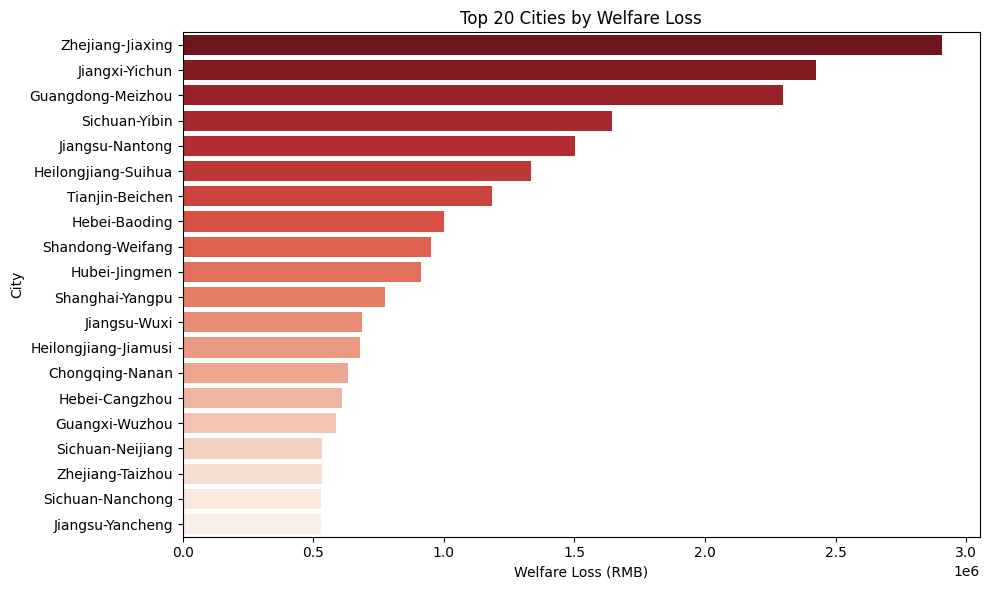

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/Users/yxy/UChi/Spring2025/MACS30123/Final_project/Data/welfare_results_mw.csv")

df["prov_city"] = df["prov"] + "-" + df["city"]

df_sorted_loss = df.sort_values(by="loss", ascending=False).head(20)


df_sorted_ratio = df.sort_values(by="loss_ratio", ascending=False).head(20)


plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted_loss, x="loss", y="prov_city", palette="Reds_r")
plt.xlabel("Welfare Loss (RMB)")
plt.ylabel("City")
plt.title("Top 20 Cities by Welfare Loss")
plt.tight_layout()
plt.savefig("/Users/yxy/UChi/Spring2025/MACS30123/Final_project/f1.png", dpi=300, bbox_inches='tight')

plt.show()





/var/folders/4g/6_8lhyp147394q93651p5kyw0000gn/T/ipykernel_87011/1392330257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted_ratio, x="loss_ratio", y="prov_city", palette="Blues_r")


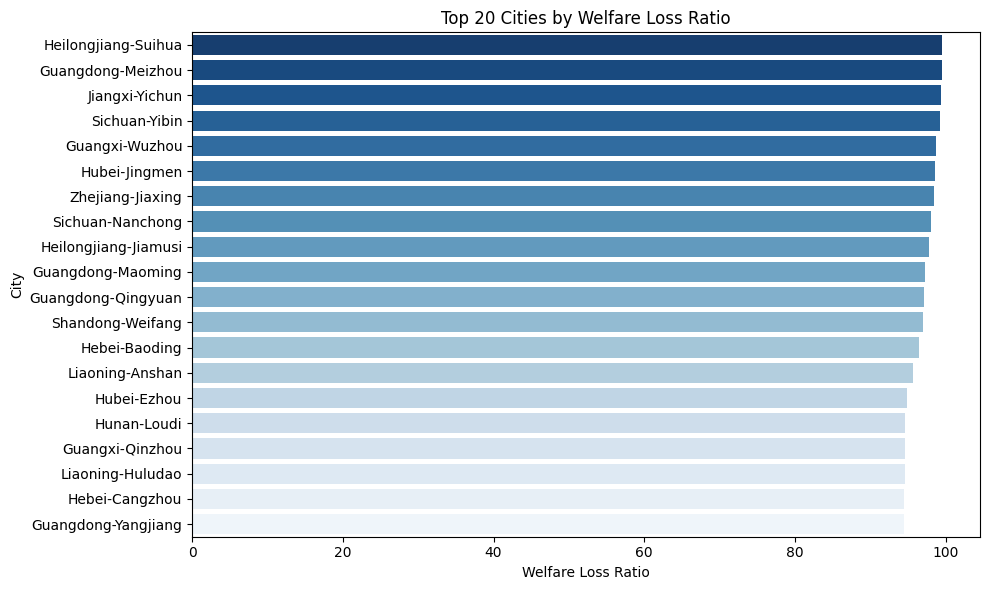

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted_ratio, x="loss_ratio", y="prov_city", palette="Blues_r")
plt.xlabel("Welfare Loss Ratio")
plt.ylabel("City")
plt.title("Top 20 Cities by Welfare Loss Ratio")
plt.tight_layout()
plt.savefig("/Users/yxy/UChi/Spring2025/MACS30123/Final_project/f2.png", dpi=300, bbox_inches='tight')

plt.show()

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt


shp_path = "/Users/yxy/UChi/Spring2025/MACS30123/Final_project/Data/Raw/China_Adm_2020/China2020City.shp"
gdf = gpd.read_file(shp_path)


gdf.rename(columns={"NAME_1": "prov", "NAME_2": "city"}, inplace=True)
gdf.loc[gdf["VAR_NAME1"] == "Shǎn Xī", "prov"] = "Shaanxi" 

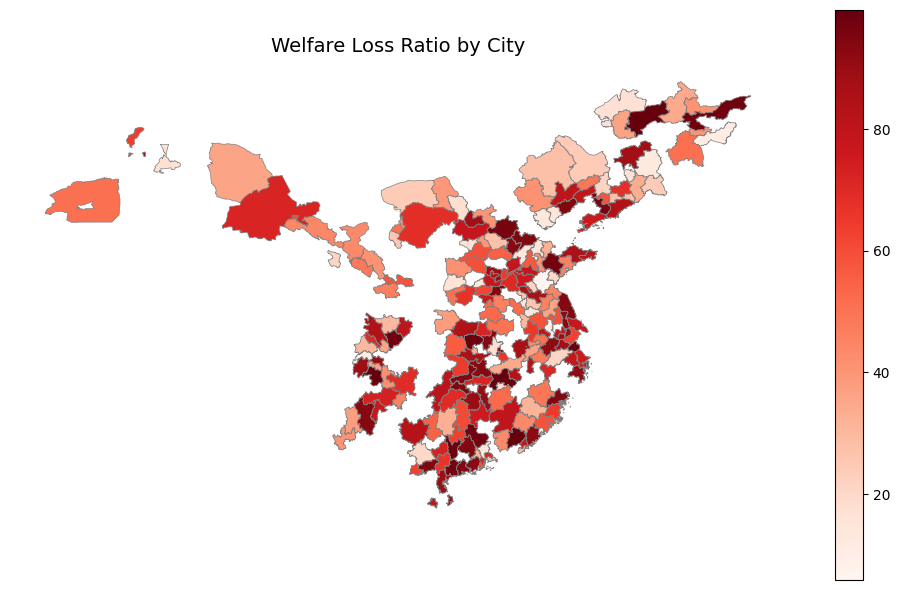

In [19]:

merged = gdf.merge(df, on=["prov", "city"], how="left")


fig, ax = plt.subplots(figsize=(10, 6)) 
merged.plot(
    column="loss_ratio",
    cmap="Reds",
    linewidth=0.5,
    edgecolor='gray',
    legend=True,
    ax=ax
)


ax.set_title("Welfare Loss Ratio by City", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.savefig("/Users/yxy/UChi/Spring2025/MACS30123/Final_project/f3.png", dpi=300, bbox_inches='tight')
plt.show()

